# Predicting Heart Disease using Machine Learning

In [ ]:
!pip show numpy pandas matplotlib seaborn scikit-learn joblib

Name: numpy
Version: 1.25.2
Summary: Fundamental package for array computing in Python
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD-3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: albumentations, altair, arviz, astropy, autograd, blis, bokeh, bqplot, chex, cmdstanpy, contourpy, cudf-cu12, cufflinks, cupy-cuda12x, cvxpy, datascience, db-dtypes, dopamine_rl, ecos, flax, folium, geemap, gensim, gym, h5py, holoviews, hyperopt, ibis-framework, imageio, imbalanced-learn, imgaug, jax, jaxlib, librosa, lightgbm, matplotlib, matplotlib-venn, missingno, mizani, ml-dtypes, mlxtend, moviepy, music21, nibabel, numba, numexpr, opencv-contrib-python, opencv-python, opencv-python-headless, opt-einsum, optax, orbax-checkpoint, osqp, pandas, pandas-gbq, pandas-stubs, patsy, plotnine, prophet, pyarrow, pycocotools, pyerfa, pymc, pytensor, python-louvain, PyWavelets, qdldl, qudida, rmm-cu12, scikit-image, scikit-learn, sc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

import joblib

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/heart/heart-disease.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


1. age -  age
2. sex - (1 = male; 0 = female)
3. cp - chest pain type - tức ngực
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) - huyết áp
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl - lượng cholestoral trong máu
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) - lượng đường trong máu
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results - kết quả điện tâm đồ
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved - nhịp tim
9. exang - exercise induced angina (1 = yes; 0 = no) - đau thắt ngực khi tập thể dục
10. oldpeak - ST depression induced by exercise relative to rest - tình trạng stress
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment -
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy - số lượng các mạch chính
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result - stress thalium
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=no, 0=yes) (= the predicted attribute)



In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

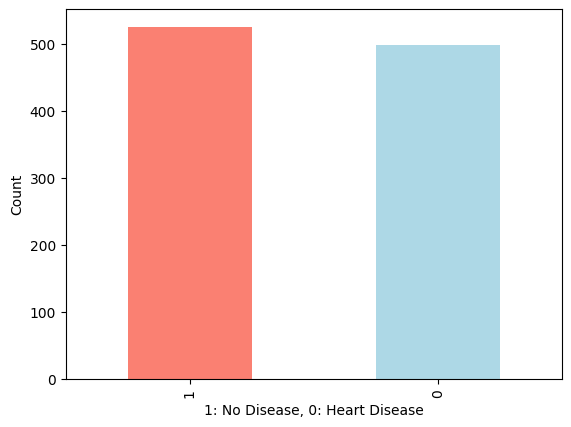

In [ ]:
df['target'].value_counts().plot.bar(color=['salmon', 'lightblue']);
plt.xlabel('1: No Disease, 0: Heart Disease')
plt.ylabel('Count');

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [ ]:
df['sex'].value_counts()

sex
1    713
0    312
Name: count, dtype: int64

In [ ]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,86,226
1,413,300


In [ ]:
226/(86+226), 300/(413+300)

(0.7243589743589743, 0.42075736325385693)

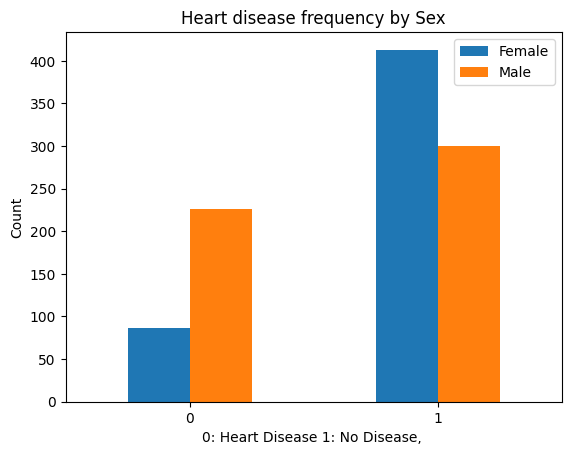

In [ ]:
pd.crosstab(df['sex'], df['target']).plot(kind='bar');
plt.title('Heart disease frequency by Sex')
plt.xlabel('0: Heart Disease 1: No Disease, ')
plt.ylabel('Count')
plt.legend(['Female', 'Male']);
plt.xticks(rotation=0);

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

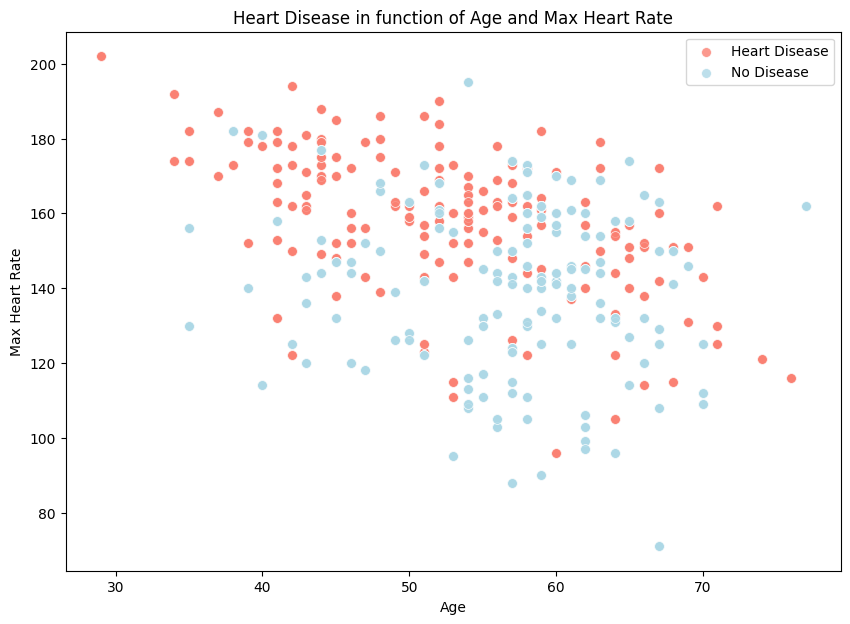

In [ ]:
plt.figure(figsize=(10, 7))

# positive cases
sns.scatterplot(data=df, x=df.age[df.target==0], y=df.thalach[df.target==0], color='salmon', s=50, alpha=0.8);

# negative cases
sns.scatterplot(data=df, x=df.age[df.target==1], y=df.thalach[df.target==1], color='lightblue', s=50, alpha=0.8)

plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate');
plt.legend(['Heart Disease', 'No Disease']);

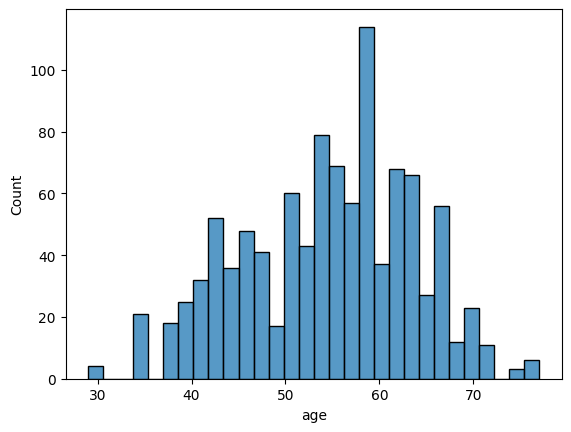

In [ ]:
sns.histplot(data=df, x=df['age'], bins=30);

In [ ]:
pd.crosstab(df['target'], df['cp'])

cp,0,1,2,3
target,,,,
0,375,33,65,26
1,122,134,219,51


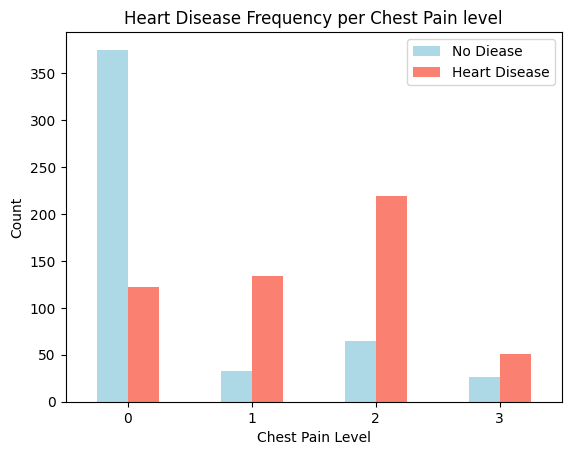

In [ ]:
pd.crosstab(df['cp'], df['target']).plot(kind='bar', color=['lightblue', 'salmon']);

plt.title('Heart Disease Frequency per Chest Pain level')
plt.xlabel('Chest Pain Level')
plt.ylabel('Count')
plt.legend(['No Diease', 'Heart Disease'])
plt.xticks(rotation=0);

In [ ]:
df.corr()['target'][:-1]

age        -0.229324
sex        -0.279501
cp          0.434854
trestbps   -0.138772
chol       -0.099966
fbs        -0.041164
restecg     0.134468
thalach     0.422895
exang      -0.438029
oldpeak    -0.438441
slope       0.345512
ca         -0.382085
thal       -0.337838
Name: target, dtype: float64

In [ ]:
# # visualization
# corr_matrix = df.corr()

# plt.figure(figsize=(12, 8))
# sns.heatmap(corr_matrix, annot=True, linewidth=0.5, fmt='.2f', cmap='viridis_r');

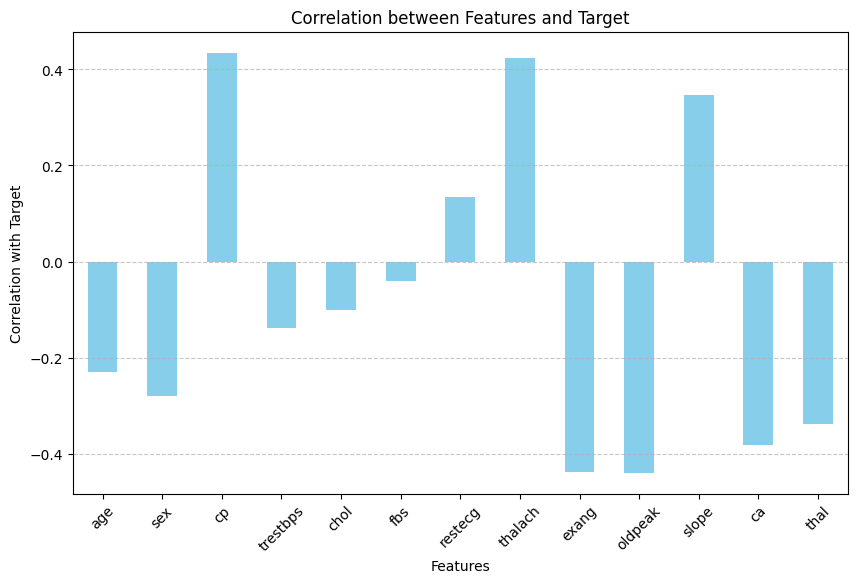

In [ ]:
# Tính toán ma trận tương quan giữa các biến mục tiêu và biến target
target_corr = df.corr()['target'][:-1]

# Vẽ biểu đồ barplot
plt.figure(figsize=(10, 6))
target_corr.plot(kind='bar', color='skyblue')
plt.title('Correlation between Features and Target')
plt.xlabel('Features')
plt.ylabel('Correlation with Target')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



# Modelling

In [ ]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


In [ ]:
# split features and labels
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
# split into training, testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((820, 13), (205, 13), (820,), (205,))

# Model Training

In [ ]:
# put models in dictionary

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'RandomForestClassifer': RandomForestClassifier()
}

# create function to fit and score model
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evalute given machine learning models.
    models: a dictionary of different scikit learn machine learning models
    X_train: training date (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test : testing labels
    returns model scores dictionary.
    """

    # set random seed
    np.random.seed(42)

    # make dictonary to keep scores
    model_scores = {}

    # loop through models to fit and score
    for model_name, model in models.items():
        model.fit(X_train, y_train) # fit model
        score = model.score(X_test, y_test) # get score
        model_scores[model_name] = score # put score for each model

    return model_scores

In [ ]:
# fit and score
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

model_scores

{'LogisticRegression': 0.7951219512195122,
 'KNN': 0.7317073170731707,
 'RandomForestClassifer': 0.9853658536585366}

In [ ]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])

model_compare.head()

,LogisticRegression,KNN,RandomForestClassifer
accuracy,0.795122,0.731707,0.985366


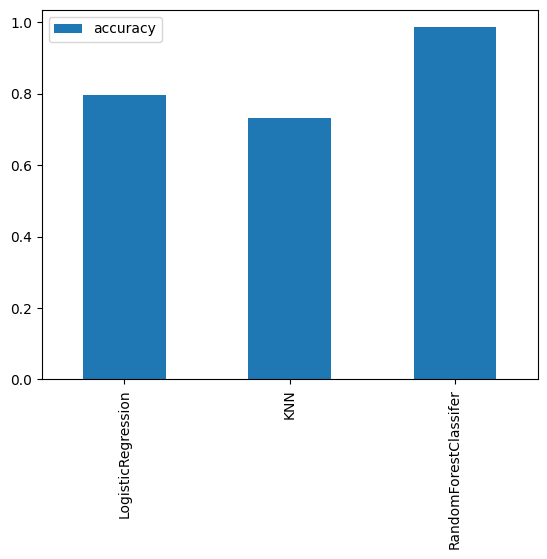

In [ ]:
model_compare.T.plot(kind='bar');

# Tuning or Improving our models

# Hyperparameter Tuning - using GridSearchCV

In [ ]:
# create hyperparameter grid for RandomForestClassifier
rf_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# set up grid hyperparameter search for RandomForestClassifier
gs_rf = GridSearchCV(RandomForestClassifier(),
                     rf_grid,
                     cv=5,
                     verbose=True)

# train the model
gs_rf.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=True)

In [ ]:
# get best parameters
gs_rf.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [ ]:
# get the score
gs_rf.score(X_test, y_test)

0.9853658536585366

# Evaluating Models

In [ ]:
# make predictions
y_preds = gs_rf.predict(X_test)

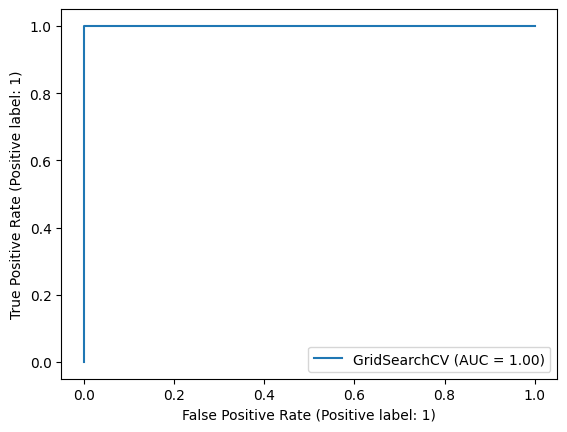

In [ ]:
# ROC curve and AUC
RocCurveDisplay.from_estimator(gs_rf, X_test, y_test);

In [ ]:
confusion_matrix(y_test, y_preds)

array([[102,   0],
       [  3, 100]])

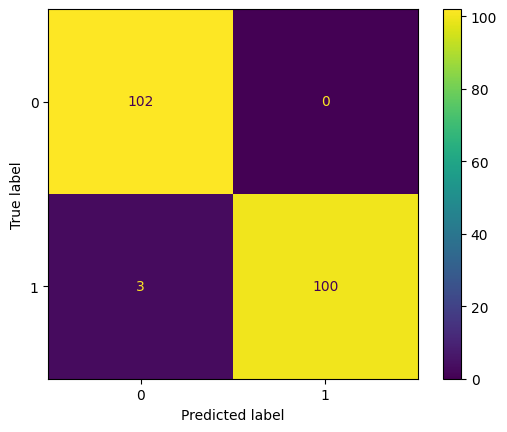

In [ ]:
ConfusionMatrixDisplay.from_estimator(gs_rf, X_test, y_test);

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



## Calculate evaluation metrics using Cross Validated Precision, Recall and F1 score

In [ ]:
# check current best parameter
gs_rf.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [ ]:
# create a new classifier with current best parameter for RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=gs_rf.best_params_['n_estimators'],
                              max_depth=gs_rf.best_params_['max_depth'],
                              min_samples_split=gs_rf.best_params_['min_samples_split'],
                              min_samples_leaf=gs_rf.best_params_['min_samples_leaf'])


In [ ]:
# Cross Validated Accuracy
cv_accuracy = cross_val_score(rfc, X, y, scoring='accuracy', cv=5)
cv_accuracy

array([1.        , 1.        , 0.98536585, 1.        , 0.98536585])

In [ ]:
# mean of cross valided accuracy
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

0.9941463414634146

In [ ]:
# Cross Validated Precision
cv_precision = cross_val_score(rfc, X, y, scoring='precision', cv=5)

cv_precision = np.mean(cv_precision)
cv_precision

0.9944954128440366

In [ ]:
# Cross Validated Recall
cv_recall = cross_val_score(rfc, X, y, scoring='recall', cv=5)

cv_recall = np.mean(cv_recall)
cv_recall

1.0

In [ ]:
# Cross Validated F1
cv_f1 = cross_val_score(rfc, X, y, scoring='f1', cv=5)

cv_f1 = np.mean(cv_f1)
cv_f1

0.9943924009171307

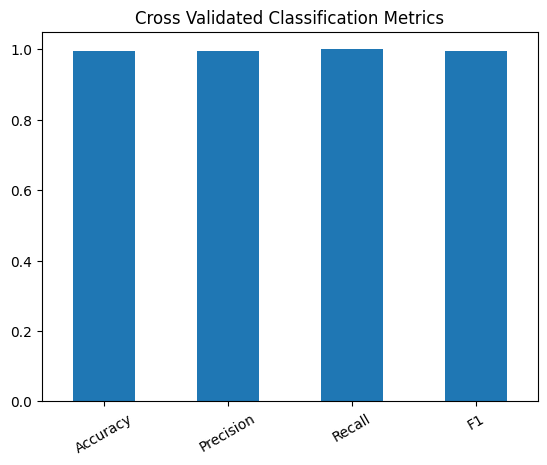

In [ ]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_accuracy,
                                            'Precision': cv_precision,
                                            'Recall': cv_recall,
                                            'F1': cv_f1},
                                             index=[0])

cv_metrics.T.plot.bar(legend=False);

plt.title('Cross Validated Classification Metrics')
plt.xticks(rotation=30);

## Feature Importance

In [ ]:
# Khởi tạo mô hình RandomForestClassifier với các tham số tốt nhất đã tìm được
model = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1)

# Huấn luyện mô hình trên dữ liệu huấn luyện
model.fit(X_train, y_train)
feature_importances = model.feature_importances_

RandomForestClassifier()

In [ ]:
# Lấy tên của các đặc trưng
feature_names = X.columns

# Tạo một DataFrame để hiển thị tên đặc trưng và đặc trưng quan trọng tương ứng
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sắp xếp DataFrame theo đặc trưng quan trọng giảm dần
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# In ra DataFrame đã sắp xếp
print(feature_importance_df)


     Feature  Importance
2         cp    0.130201
9    oldpeak    0.129723
11        ca    0.123407
12      thal    0.118105
7    thalach    0.112759
4       chol    0.080204
0        age    0.077123
3   trestbps    0.069741
8      exang    0.062494
10     slope    0.037319
1        sex    0.028581
6    restecg    0.021208
5        fbs    0.009134


In [ ]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [ ]:
# Tạo một dictionary ánh xạ đặc trưng quan trọng với tên cột tương ứng
feature_dict = dict(zip(X.columns, model.feature_importances_))

feature_dict


{'age': 0.07712262948747083,
 'sex': 0.02858089112243672,
 'cp': 0.1302006841556289,
 'trestbps': 0.0697414329631397,
 'chol': 0.0802044745435781,
 'fbs': 0.009134327025339714,
 'restecg': 0.021207777756163067,
 'thalach': 0.11275869879957781,
 'exang': 0.06249414557356789,
 'oldpeak': 0.12972345188291623,
 'slope': 0.03731915540406714,
 'ca': 0.12340710686505009,
 'thal': 0.1181052244210639}

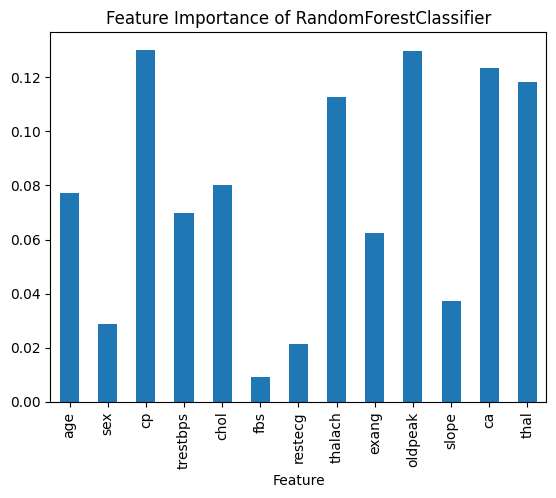

In [ ]:
# Tạo DataFrame từ dictionary của mức độ quan trọng của các đặc trưng
feature_df = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})

# Vẽ biểu đồ cột của mức độ quan trọng của các đặc trưng
feature_df.plot.bar(x='Feature', y='Importance', title='Feature Importance of RandomForestClassifier', legend=False);


In [ ]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [ ]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [ ]:
def predict_Heart_Disease(age,sex,cp,trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal):
    #loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = age
    x[1] = sex
    x[2] = cp
    x[3] = trestbps
    x[4] = chol
    x[5] = fbs
    x[6] = restecg
    x[7] = thalach
    x[8] = exang
    x[9] = oldpeak
    x[10] = slope
    x[11] = ca
    x[12] = thal
    #if loc_index >= 0:
       #x[loc_index] = 1

    return gs_rf.predict([x])[0]

In [ ]:
predict_Heart_Disease(70, 1, 0, 145, 174, 0, 1, 125, 1, 2.6, 0, 0, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0

In [ ]:
joblib.dump(gs_rf, 'heart_disease_model.pkl')

['heart_disease_model.pkl']